# Mass

In [1]:
using DSP  # for unwrap
using Interpolations
using LaTeXStrings
using Printf
using Plots, Measures
theme(:wong2)
include("../Utils/misc-tsv.jl")
include("../Utils/misc-tool.jl")

Main.MiscTool

## Irreducible mass

M_H[t=0] = 0.5000962892
M_H[t=0] = 0.5000969718
M_H[t=0] = 0.5000973173
[4005, 4807, 5877] -> [650.0, 650.0, 650.0]
M_H[t=650] = 0.8843594018
M_H[t=650] = 0.8843579615
M_H[t=650] = 0.8843572682


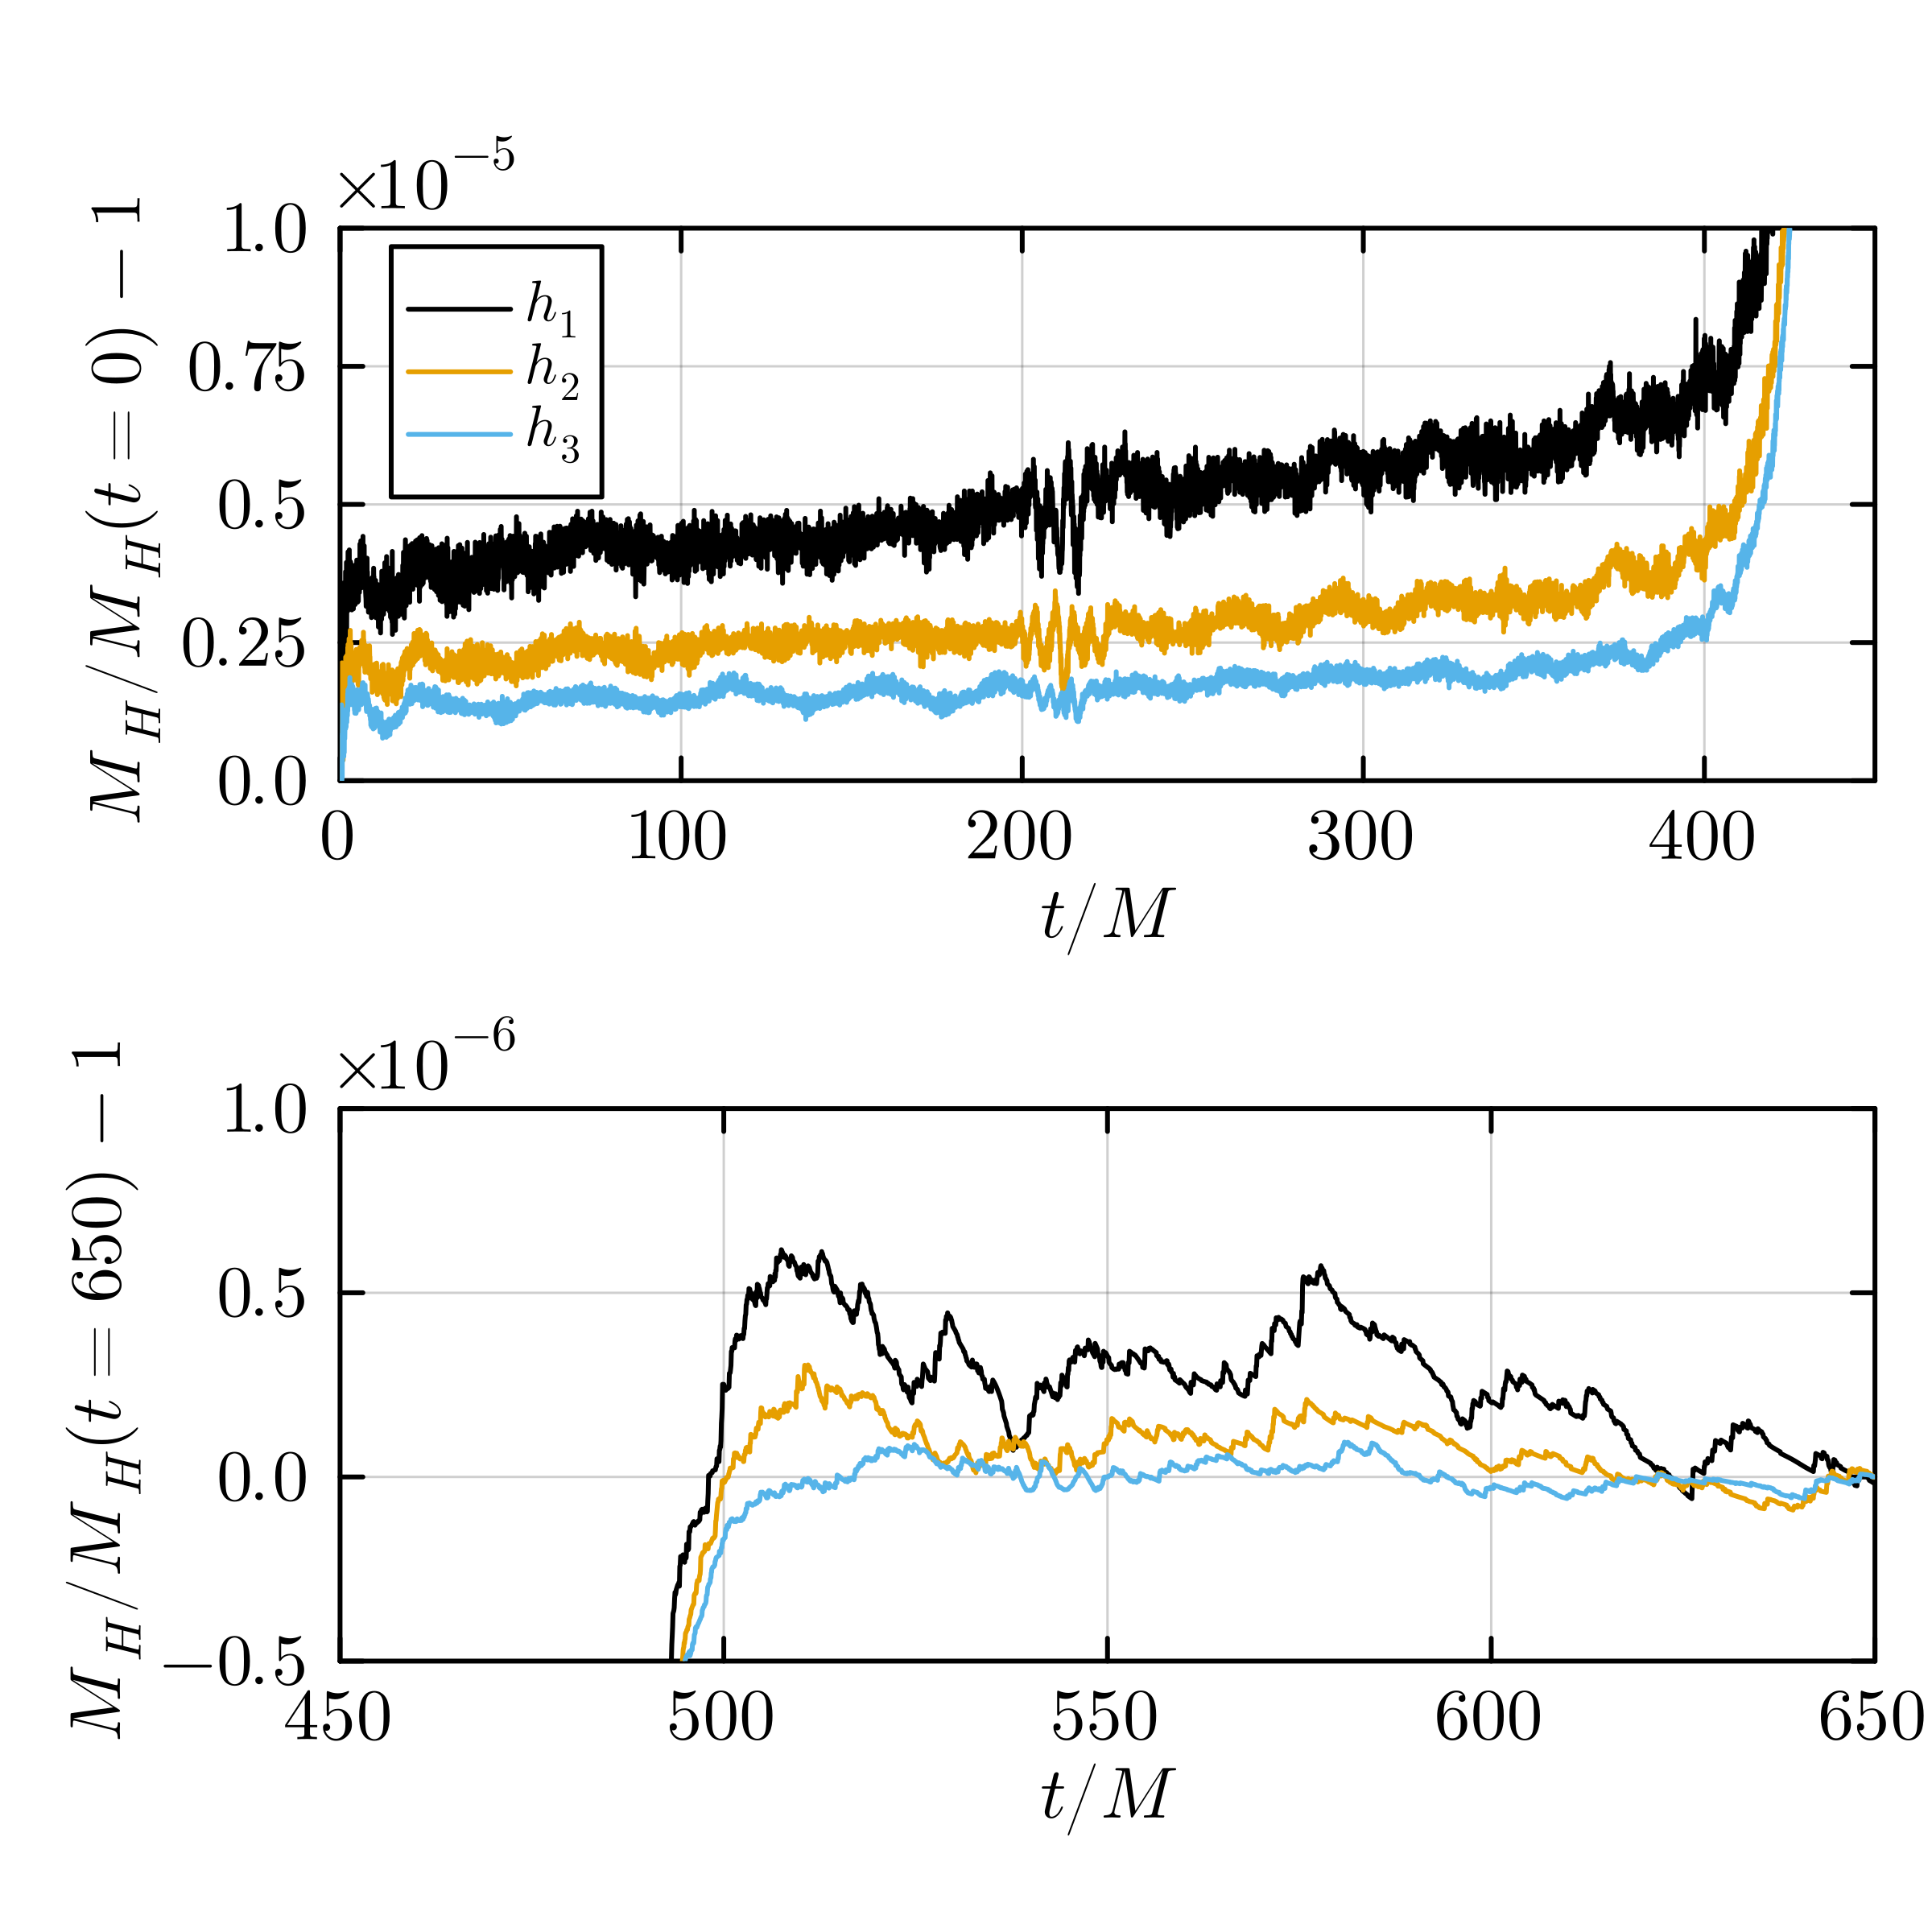

In [13]:
let dirsZ, dirsL, fZ_A, fL_A, fZ_phi, fL_phi
    dirsZ = [
        ("q1-Z4cow-low/Sum/BH_diagnostics.ah1.gp", "low"),
        ("q1-Z4cow-low/Sum/BH_diagnostics.ah2.gp", "low"),
        ("q1-Z4cow-low/Sum/BH_diagnostics.ah3.gp", "low"),
        ("q1-Z4cow-med/Sum/BH_diagnostics.ah1.gp", "med"),
        ("q1-Z4cow-med/Sum/BH_diagnostics.ah2.gp", "med"),
        ("q1-Z4cow-med/Sum/BH_diagnostics.ah3.gp", "med"),
        ("q1-Z4cow-high/Sum/BH_diagnostics.ah1.gp", "high"),
        ("q1-Z4cow-high/Sum/BH_diagnostics.ah2.gp", "high"),
        ("q1-Z4cow-high/Sum/BH_diagnostics.ah3.gp", "high"),
    ]
    (datsZ, _) = MiscTSV.load_data_0d(dirsZ; cols=[2, 27], parent_dir="../../data/q1")
    labsZ = [L"h_1", L"h_2", L"h_3"]

    #########
    # Plot1 #
    #########
    p1 = plot(titlefontsize=10, guidefontsize=10, tickfontsize=10, legendfontsize=8)
    xs = 0:100:400
    xticks!(p1, xs, [L"%$(n)" for n in xs])
    for i in 1:3
        idx1 = (i-1)*3 + 1
        d1 = datsZ[idx1]
        p1 = plot!(d1[1], d1[2]/d1[2][1] .- 1, label=labsZ[i])
        println("M_H[t=0] = ", d1[2][1])
    end
    p1 = plot!(xlabel=L"t/M", ylabel=L"M_H/M_H(t=0)-1", xlim=(0,450), ylim=(0, 1e-5), framestyle=:box)
    #p1 = plot!(xlabel=L"t/M", ylabel=L"M_H", xlim=(0,450), ylim=(9.7e-5,1.01e-4), framestyle=:box)
    p1 = plot!(yaxis=(formatter=(f)->L"%$(round(f * 1e5, digits=2))"), topmargin=1cm)
    p1 = annotate!(0, 1e-5*1.1, Plots.text(L"\times10^{-5}", 10, :black, :left))
    
    #########
    # Plot3 #
    #########
    
    # find indices correspond to t=650
    idx_t650 = [findfirst(x -> isapprox(x, 650, atol=1e-4), datsZ[(i-1)*3+3][1]) for i in 1:3]
    println("Indices correspond to t=650: ", idx_t650, " -> ", [datsZ[(i-1)*3+3][1][idx] for (i, idx) in enumerate(idx_t650)])
    
    p3 = plot(titlefontsize=10, guidefontsize=10, tickfontsize=10, legendfontsize=8)
    xs = 450:50:650
    xticks!(p3, xs, [L"%$(n)" for n in xs])
    for i in 1:3
        idx3 = (i-1)*3 + 3
        d3 = datsZ[idx3]
        p3 = plot!(d3[1], d3[2]/d3[2][idx_t650[i]] .- 1, label="")
        println("M_H[t=650] = ", d3[2][idx_t650[i]])
    end
    p3 = plot!(xlabel=L"t/M", ylabel=L"M_H/M_H(t=650)-1", xlim=(450,650), ylim=(-5e-7,1e-6), framestyle=:box)
    #p3 = plot!(xlabel=L"t/M", ylabel=L"M_H", xlim=(450,650), ylim=(5.5e-5,6.1e-5), framestyle=:box)
    p3 = plot!(yaxis=(formatter=(f)->L"%$(round(f * 1e6, digits=1))"))
    p3 = annotate!(450, (1e-6)*1.15, Plots.text(L"\times10^{-6}", 10, :black, :left))
    
    plt = plot(p1, p3, layout=(2,1), size=(400, 400), dpi=600)
    # savefig(plt, "Mass.pdf")
    display(plt)
end